In [1]:
import os
%pwd
os.chdir("../")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
df = pd.read_csv('artifacts/data_ingestion/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
corr =df.corr()

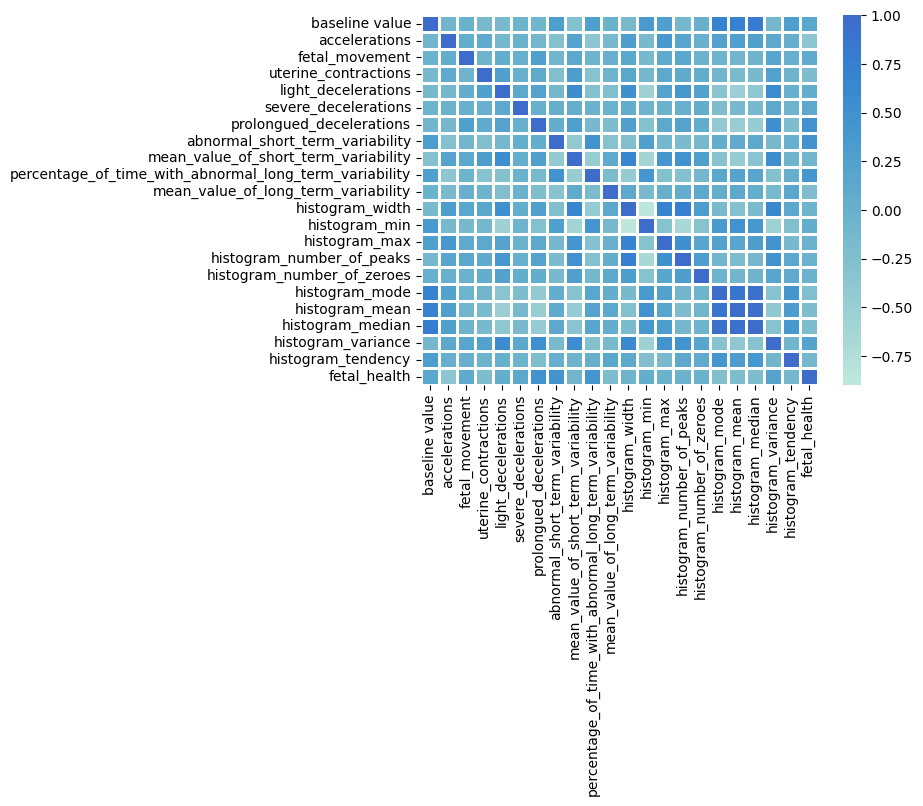

In [10]:
import seaborn as sns
sns.heatmap(corr, center=3, annot=False, linewidths=0.8);

In [11]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [16]:
df.corr()['fetal_health'].sort_values()

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [20]:
# now scaling the dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

stdscal = StandardScaler()

In [104]:
x = df.drop('fetal_health',axis=1)
y= df['fetal_health']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = stdscal.fit_transform(x_train)

x_test = stdscal.transform(x_test)

In [105]:
# Model creation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier(criterion='log_loss')

dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.931924882629108


In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.92018779342723


In [107]:
from sklearn.svm import SVC

svm = SVC(C=80,degree=40)

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9342723004694836
